In [55]:
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")

import argparse, sys, os
import os.path
import subprocess
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, TPaveStats, gPad
from scipy import stats
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import itertools
import re
import pandas as pd
from ROOT import TH1F, TH2F, TF1, TCanvas, TStyle, gROOT, gStyle, TColor 

def SetMyStyle():
  print("\n ~/rootlogon.C loaded with !!4 sig.fig.!! for custom Opt Fit and Stat!\n")
  MyStyle = myStyle()
  gROOT.SetStyle("MyStyle")
  gROOT.ForceStyle()


def myStyle():
  myStyle  = TStyle("MyStyle", "My Root Styles")
  #Canvas
  myStyle.SetCanvasBorderMode(0)  # Transparent
  myStyle.SetCanvasColor(0) # Transparent 
  #Paper, Pad, Palette, Frame
  myStyle.SetPadBorderMode(0) # Transparent 
  myStyle.SetPadColor(0) # Transparent 
  myStyle.SetPalette(1) # Default 
  myStyle.SetFrameBorderMode(1) # Border
   # Axis 
  myStyle.SetLabelSize(0.04, "xyz") # size of axis values
  myStyle.SetTitleSize(0.04, "xyz")
  myStyle.SetPadTickX(1)
  myStyle.SetPadTickY(1)
  # Title 
  myStyle.SetTitleColor(0) # Black 
  myStyle.SetTitleStyle(0) # Transparent 
  myStyle.SetTitleBorderSize(0) # Transparent
  myStyle.SetTitleY(0.97) # Set y-position (fraction of pad size)
  myStyle.SetTitleX(0.4) # Set x-position (fraction of pad size)
  # #Stat box dimensions, position and style 
  myStyle.SetStatY(0.89) # Set y-position (fraction of pad size)
  myStyle.SetStatX(0.89) # Set x-position (fraction of pad size)
  myStyle.SetStatW(0.36) # Set width of stat-box (fraction of pad size)
  myStyle.SetStatH(0.12) # Set height of stat-box (fraction of pad size)
  myStyle.SetStatStyle(0) # Transparent 
  myStyle.SetStatColor(0)  # Transparent
  myStyle.SetStatBorderSize(1) # Transparent
  # Histo Filling (visual)
  myStyle.SetHistFillColor(0)
  myStyle.SetHistFillStyle(0)      
  # Stats display options 
  #myStyle.SetOptStat("ourRmMe") #over/under -flows, Rms and Means with errors, number of entries
  myStyle.SetOptStat("neouRM") #over/under -flows, Rms and Means with errors, number of entries
  myStyle.SetOptFit(1111)  #probability, Chi2, errors, name/values of parameters
  myStyle.SetStatFormat("11.4f")  # 4 sig.fig, f=float

  return myStyle


def getOffsets(f, name):
    offsets = [] #tmp storage buffer 
    for line in f:
        if re.match(name, line):
            copy = True
            offsets=line 

        else:
            copy = False

    return offsets   

SetMyStyle() 


 ~/rootlogon.C loaded with !!4 sig.fig.!! for custom Opt Fit and Stat!



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ver


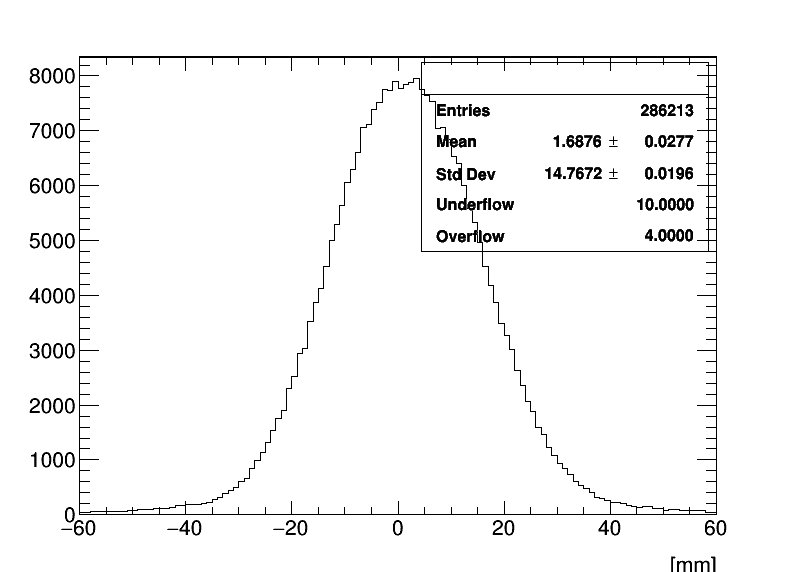

In [59]:
#Define constants 
station12Path = "Extrapolation/vertices/station12/pValue>0.005_and_noVolumesHit/"
station18Path = "Extrapolation/vertices/station18/pValue>0.005_and_noVolumesHit/"
plotNames=["h_radialPos_vs_time", "h_verticalPos_vs_time"]

#Open TFile
scr = "/Users/gleb/software/alignTrack/mpIIDESY/Systematics_ana/nominal/trackRecoPlots.root"
scrFile = TFile.Open(scr)

#Get TH2F histo 
s12_ver_2D = scrFile.Get(str(station12Path)+plotNames[1]) 

#Make new canvas for plots 
c_ver = TCanvas("c_ver", "Vertical Projection", 800, 600)
c_ver.Divide(1,1)

# #Apply 30 us time cut 
first_bin = s12_ver_2D.GetXaxis().FindBin(30.0) 

# Project the beam postion into 1D histo
s12_ver_Y = s12_ver_2D.ProjectionY("", first_bin, -1)
s12_ver_Y.SetTitle("")
s12_ver_Y.GetXaxis().SetTitle("[mm]")
s12_ver_Y.GetXaxis().SetRangeUser(-60, 60)

s12_ver_Y.Draw()

c_ver.Draw()